# Exploratory Data Analaysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf  
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df0 = pd.read_csv("DATASETS/penguins_size.csv")
df = df0.copy()

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

In [10]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [11]:
unique_values(df, cat_features)

# object featurların unique kategorik gözlemlerini listeliyoruz. Sex'te "." olarak yanlış bir kategorik veri var. Bundan
# kurtulmamız gerekiyor.

Column: species
------------------------------
Unique Values (3): ['Adelie' 'Chinstrap' 'Gentoo']

Value Counts:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

Column: island
------------------------------
Unique Values (3): ['Torgersen' 'Biscoe' 'Dream']

Value Counts:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

Column: sex
------------------------------
Unique Values (3): ['MALE' 'FEMALE' '.']

Value Counts:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [12]:
df[df["sex"]=="."]

# sex featurandaki yanlış kategorik veriyi tespit ediyoruz.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [14]:
df.loc[336, "sex"] = "MALE"

In [15]:
df.loc[336, "sex"]

'MALE'

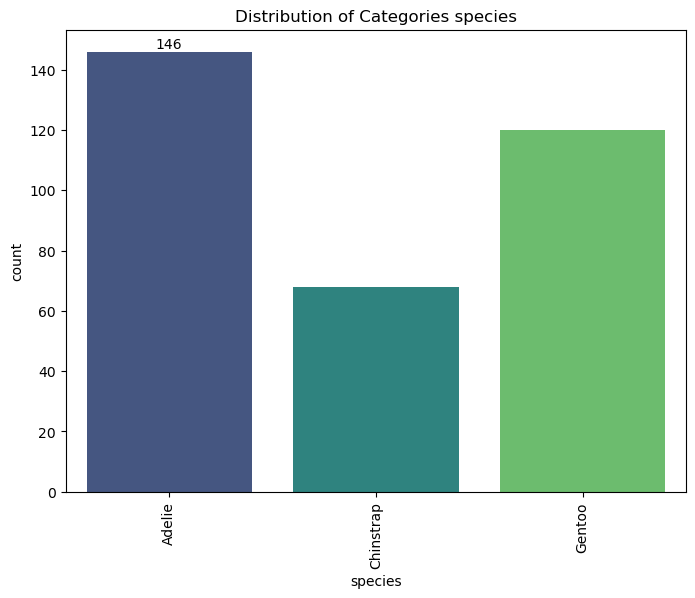

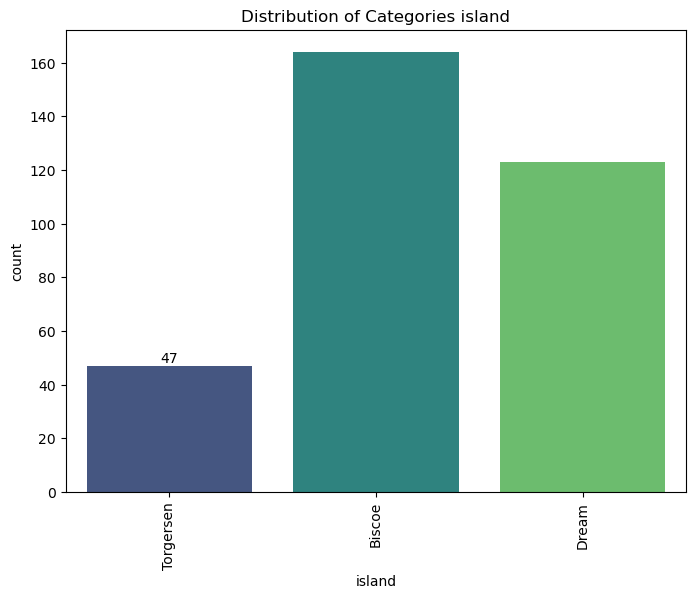

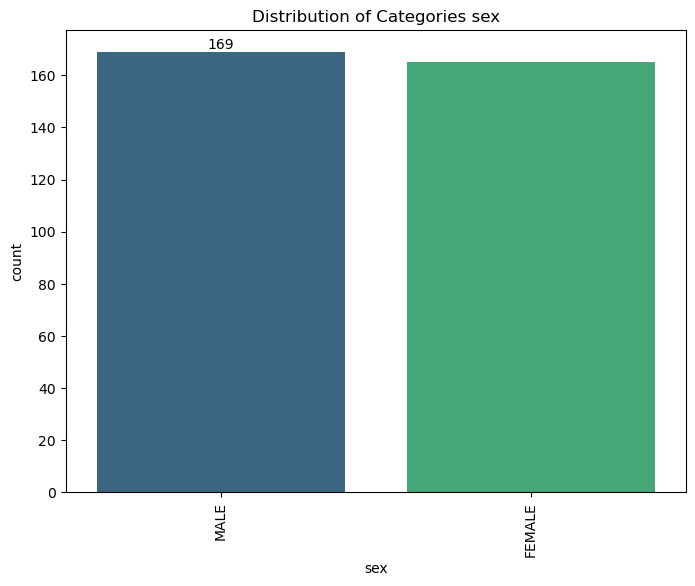

In [16]:
# Kategorik feature ların dağılımını göstermek için;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

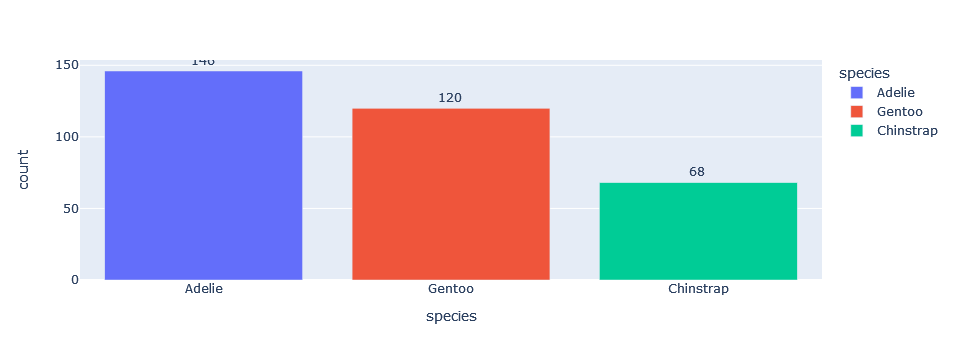

In [17]:
species_count = df['species'].value_counts().reset_index()
species_count.columns = ['species', 'count']

fig = px.bar(species_count, x='species', y='count', text='count', color='species')

fig.update_traces(texttemplate='%{text}', textposition='outside')

# ax = sns.countplot(x="species", data=df)
# ax.bar_label(ax.containers[0]);

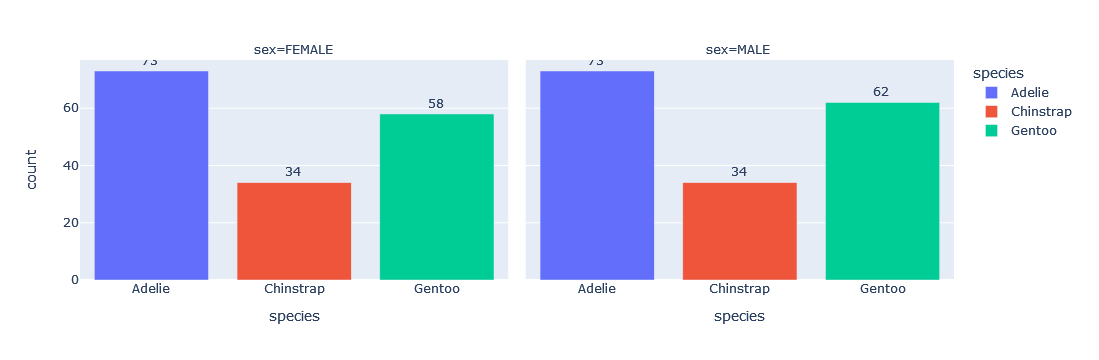

In [18]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='species', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

# g = sns.catplot(x="species", data=df, kind="count", col="sex")
# g.facet_axis(0, 0).bar_label(container=g.facet_axis(0, 0).containers[0])
# g.facet_axis(0, 1).bar_label(container=g.facet_axis(0, 1).containers[0])

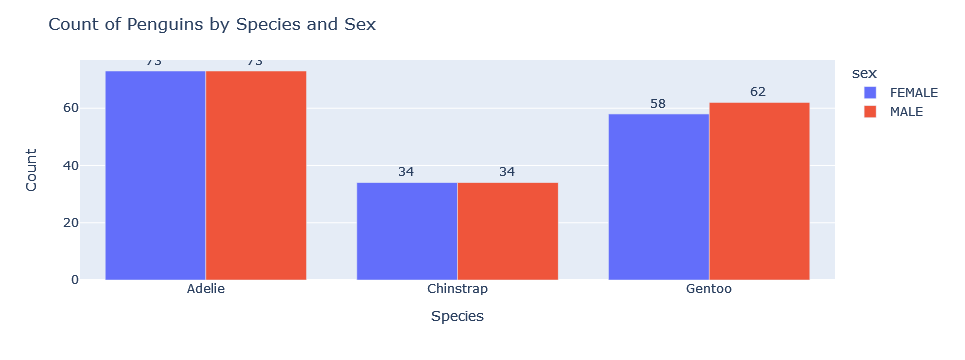

In [19]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='sex', text='count', barmode='group')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Species',
    yaxis_title='Count',
    title='Count of Penguins by Species and Sex'
)

fig.show()

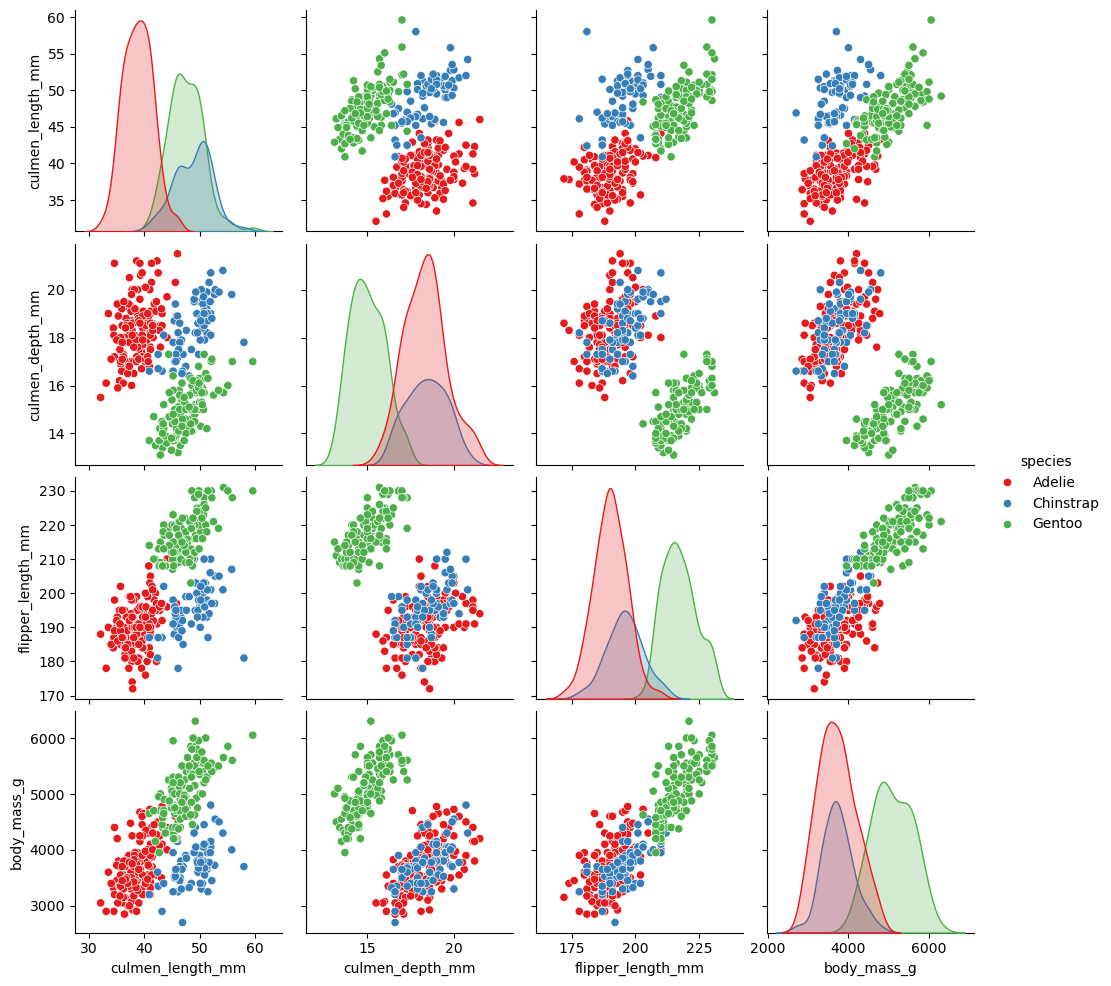

In [20]:
sns.pairplot(df, hue="species", palette="Set1");

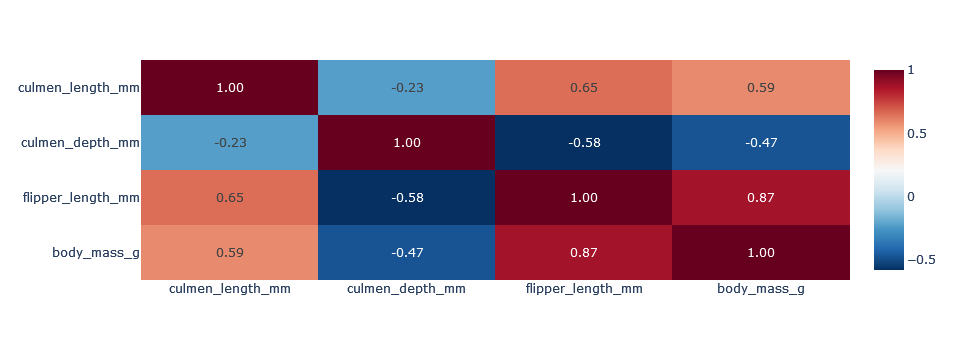

In [21]:
import plotly.express as px

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

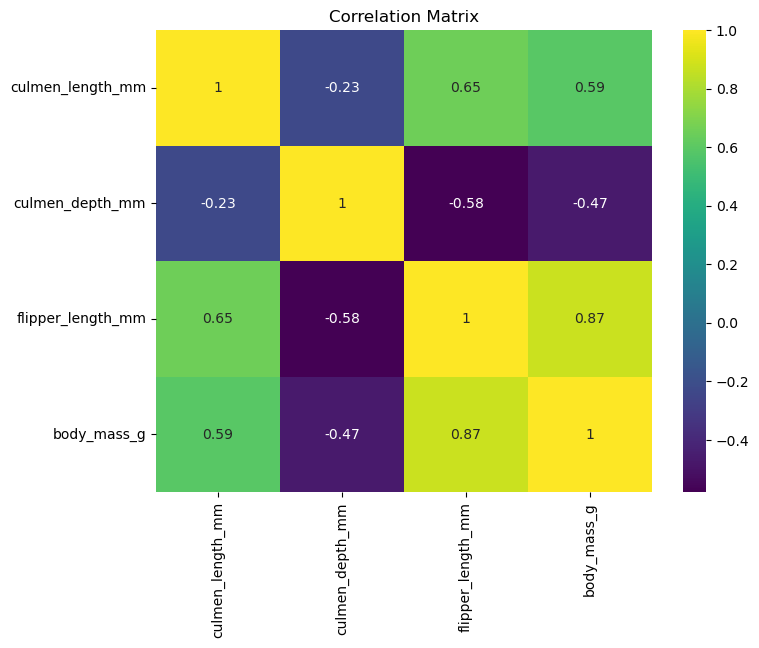

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

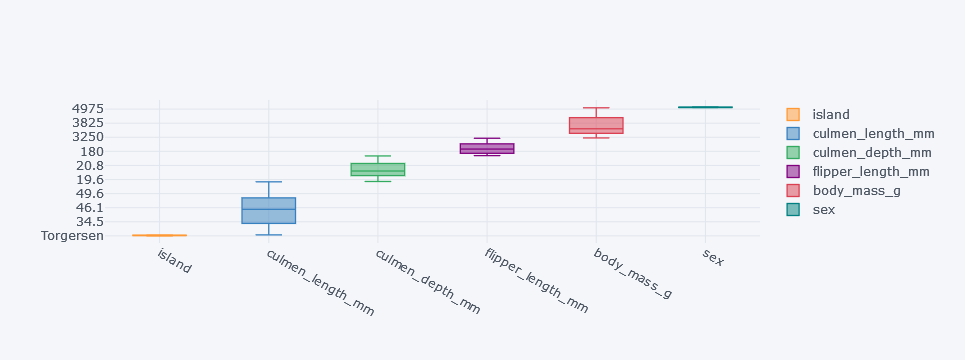

In [23]:
cf.go_offline()
df.iloc[:,1:].iplot(kind="box")

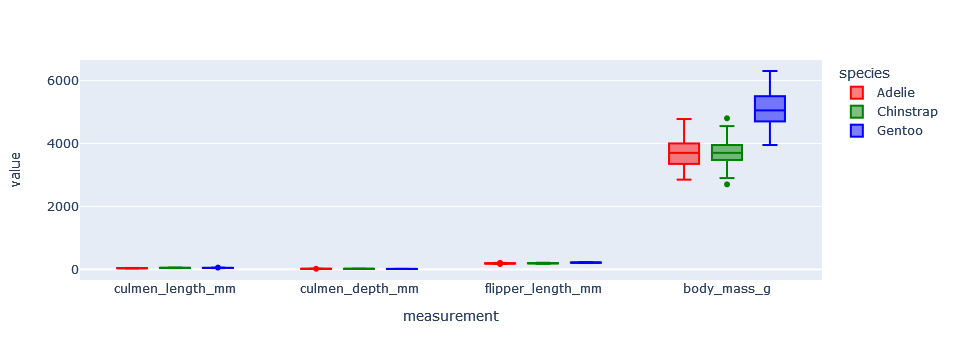

In [24]:
df_long = df.melt(id_vars=['species'],
                  value_vars=num_features,
                  var_name='measurement')

color_discrete_map = {
    "Adelie": 'red',
    "Chinstrap": 'green',
    "Gentoo": 'blue'
}

fig = px.box(df_long,
             x='measurement',
             y='value',
             color='species',
             color_discrete_map=color_discrete_map)

fig.show()

**melt fonksiyonu**, DataFrame'leri "uzun" formata dönüştürmek için kullanılan bir fonksiyondur. 


| species | length | width | height |
|---------|--------|-------|--------|
| Adelie  | 10     | 5     | 20     |
| Chinstrap | 12   | 6     | 22     |

```python
df.melt(id_vars=['species'], value_vars=['length', 'width', 'height'], var_name='measurement')
```

| species   | measurement | value |
|-----------|-------------|-------|
| Adelie    | length      | 10    |
| Adelie    | width       | 5     |
| Adelie    | height      | 20    |
| Chinstrap | length      | 12    |
| Chinstrap | width       | 6     |
| Chinstrap | height      | 22    |


# Modelling

## Train | Test Split

In [27]:
X = df.drop('species',axis=1)
y = df['species']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [29]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 
column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough')

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# fit işlemi ile train datasının önce kategorik featurları tespit edilip bu featurlar içerisindeki 
# unique kategorik veriler numeric verilere dönüştürülüyor ve ilgili modele gönderilerek eğitim yapılıyor.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=101))])

## Model Performance

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [33]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [34]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

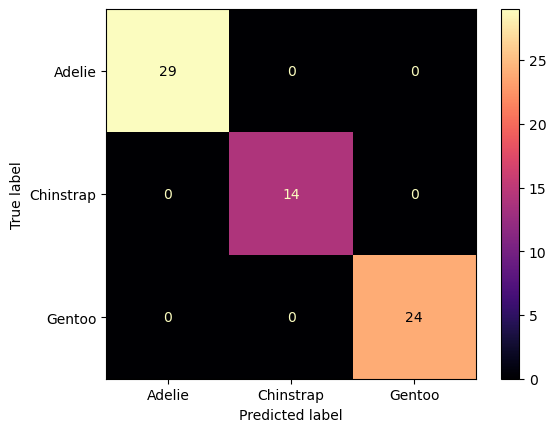

In [35]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, cmap="magma");

In [36]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [37]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.985185
train_accuracy           1.000000
test_precision_micro     0.985185
train_precision_micro    1.000000
test_recall_micro        0.985185
train_recall_micro       1.000000
test_f1_micro            0.985185
train_f1_micro           1.000000
dtype: float64

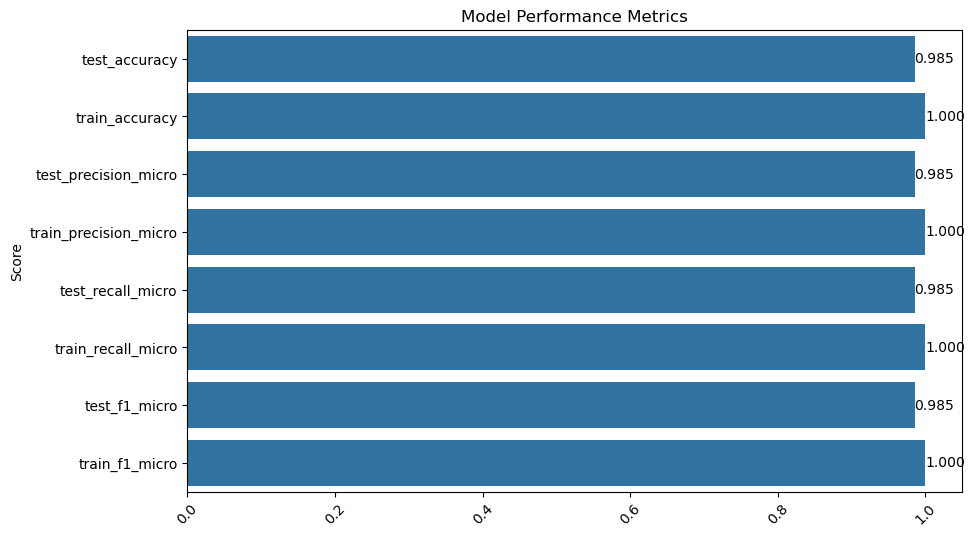

In [38]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f') 
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

In [42]:
from scikitplot.metrics import plot_roc, precision_recall_curve

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

ImportError: cannot import name 'interp' from 'scipy' (C:\Users\monstr\anaconda3\Lib\site-packages\scipy\__init__.py)

## Overfitting Risk and Features Importance in Random Forest

In [43]:
pipe_model["RF_model"].feature_importances_ # rf_model.feature_importances_

array([0.10360177, 0.00685424, 0.34896369, 0.17506071, 0.25094389,
       0.11457569])

In [44]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [45]:
X_train.sample()

# Normalde datayı pipeline verdiğimiz df'in feature sıralaması aşağıda olduğu gibiydi.

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
35,Dream,39.2,21.1,196.0,4150.0,MALE


In [46]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [47]:
df_fi = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index = new_features, #index=X.columns
                              columns = ["Feature Importance"])

df_fi = df_fi.sort_values("Feature Importance", ascending = False)
df_fi

,Feature Importance
culmen_length_mm,0.348964
flipper_length_mm,0.250944
culmen_depth_mm,0.175061
body_mass_g,0.114576
island,0.103602
sex,0.006854


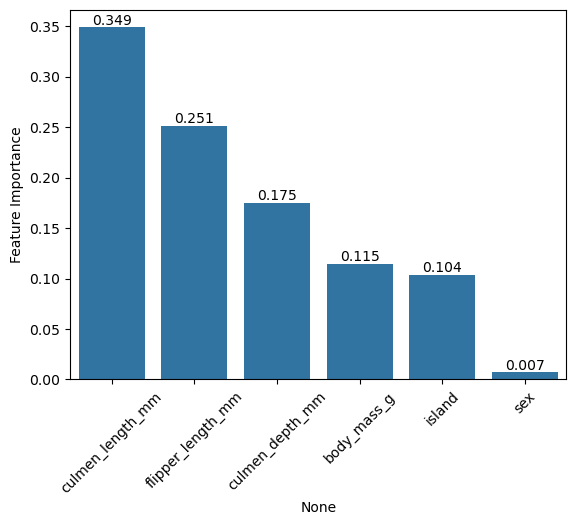

In [48]:
ax =sns.barplot(x = df_fi.index, y = 'Feature Importance', data = df_fi)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 45)
plt.show();

# feature importance değerlerini barplot ile görselleştiriyoruz. 
# Feature selection yaparken burdaki sıralamaya göre yapıyoruz.

## Understanding and Evaluating Hyperparameters in Random Forest

In [49]:
from sklearn.tree import plot_tree 

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], feature_names=new_features, #features_names=X.columns
          class_names=df.species.unique().tolist(),
          filled = True,
          fontsize = 8);

# model["RF_model"].estimators_[number_of_tree] kodu ile agaç numarasını (number_of_tree) vererek istediğimiz agacı
# görselleştirebiliyoruz.

In [50]:
RF_model = RandomForestClassifier(random_state=101, max_samples=0.5)
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations) # pruned_tree = RandomForestClassifier(max_samples=0.5)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



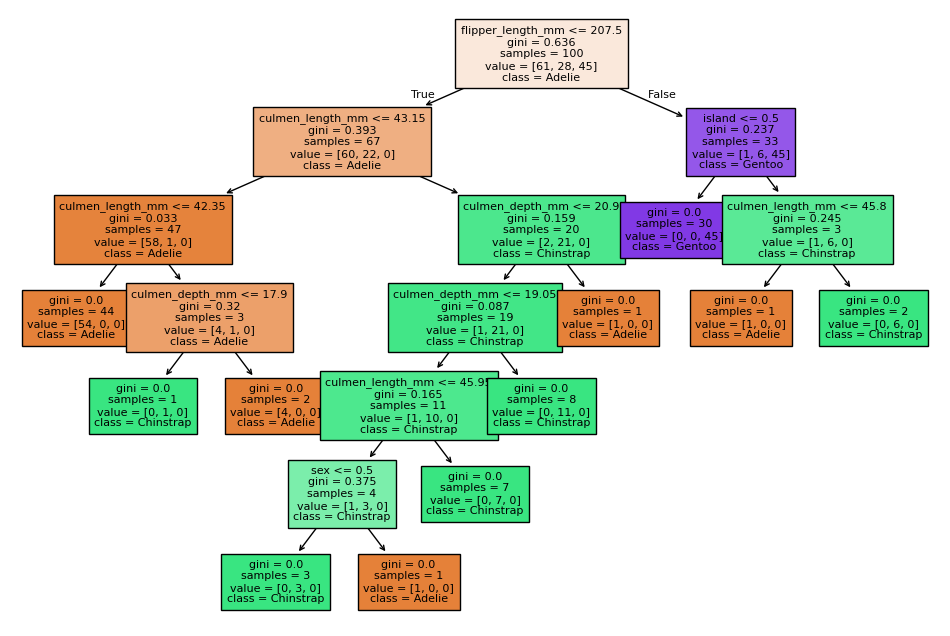

In [51]:
report_model(pruned_tree, 25)

# 133*2/3 = 89

#train darasında bulunan 267 gözlemin yarısının (max_samples=0.5 old. için) yaklaşık olarak 2/3'ü her agaçta kullanılıyor
# bu agaçta gördüğünüz gibi bu orana yakın bir gözlem kullanılmıştır.

# Final Model & Prediction

In [52]:
X = df.drop(columns=["species"])
y = df['species']

In [53]:
operations = [("transformer", column_trans), ("RF", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

# scorlarımız çok iyi olduğundan gridsearch yapmadık aşağıda çözeceğimiz diabet datasetinde gridsearch yapacağız.

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF', RandomForestClassifier(random_state=101))])

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [55]:
observations = {"island": ["Torgersen", "Dream"], "culmen_length_mm":[35, 40], "culmen_depth_mm":[15, 20],
               "flipper_length_mm":[175, 210], "body_mass_g":[3000, 4600], "sex":["FEMALE", "MALE"]}

In [56]:
obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,175,3000,FEMALE
1,Dream,40,20,210,4600,MALE


In [57]:
pred = pipe_model.predict(obs)
pred

array(['Adelie', 'Adelie'], dtype=object)

## Inverse Transform

In [58]:
enc = OrdinalEncoder()

In [59]:
obs[cat]

,island,sex
0,Torgersen,FEMALE
1,Dream,MALE


In [60]:
obs[cat] = enc.fit_transform(obs[cat])

In [61]:
obs[cat].head()

,island,sex
0,1.0,0.0
1,0.0,1.0


In [62]:
obs[cat] = enc.inverse_transform(obs[cat])

In [63]:
obs[cat] 

,island,sex
0,Torgersen,FEMALE
1,Dream,MALE


In [64]:
pred = pd.Series(pred).rename("prediction")

In [65]:
pd.concat([obs, pred], axis = 1)

# bu şekilde prediclerimizin ne olduğunu tahminden sonra da okunabilir olarak görebiliriz.

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,prediction
0,Torgersen,35,15,175,3000,FEMALE,Adelie
1,Dream,40,20,210,4600,MALE,Adelie


## DT and RF for Diabetes Dataset

In [67]:
df = pd.read_csv("DATASETS/diabetes.csv") 

# Yukarida skorlarimiz cok iyiydi bu yuzden GridSearch yapmamistik. 
#Şimdi unbalanced bir dataset olan 'ditabes.csv' datasi uzerinden hem Decision Tree hem Random Forest modellerine bakalim

In [68]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

# outlier lardan hızlı bir şekilde temizliyoruz.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    int64  
 2   BloodPressure             720 non-null    int64  
 3   SkinThickness             720 non-null    int64  
 4   Insulin                   720 non-null    int64  
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.2 KB


In [71]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

## Train | Test Split

In [72]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modelling and Model Performance

### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

# Datamız dengesiz olduğundan ve hedef labelımın skoru kötü olduğundan direk class_weight = "balanced" kullandım.
# OVERFITTING ??

Test_Set
[[78 19]
 [19 28]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.60      0.60      0.60        47

    accuracy                           0.74       144
   macro avg       0.70      0.70      0.70       144
weighted avg       0.74      0.74      0.74       144


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [76]:
from sklearn.model_selection import StratifiedKFold

model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)


cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# overfitingi teyit ediyorum.

test_accuracy      0.753267
train_accuracy     1.000000
test_precision     0.646219
train_precision    1.000000
test_recall        0.630000
train_recall       1.000000
test_f1            0.634405
train_f1           1.000000
dtype: float64

In [77]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 2, 3, 4],
              "min_samples_leaf": [2, 3],
              "min_samples_split": [2, 3, 4]}

In [78]:
model = DecisionTreeClassifier(class_weight="balanced", random_state=101)

cv = StratifiedKFold(n_splits=10)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            cv = cv,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

# scoring içine recall yazdığımız için modelimiz recall u maximize etmeye çalışacak

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [79]:
dt_grid_model.best_params_

{'max_depth': 2,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [80]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=101, splitter='random')

In [81]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

# overfiting yok görünüyor ama kesin teyidimizi CV'da yapacağız.
# Hedef classımız Test datasındaki 1 scorlarını  CV'dan alacağımız validation setlerinin ortalama değeri ile
# karşılaştırıp skorumuzu teyit edeceğiz.

Test_Set
[[24 73]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.86      0.25      0.38        97
           1       0.37      0.91      0.53        47

    accuracy                           0.47       144
   macro avg       0.61      0.58      0.46       144
weighted avg       0.70      0.47      0.43       144


Train_Set
[[142 234]
 [  9 191]]
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       376
           1       0.45      0.95      0.61       200

    accuracy                           0.58       576
   macro avg       0.69      0.67      0.58       576
weighted avg       0.77      0.58      0.56       576



In [82]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=101, splitter='random')

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# Overfiting yok. Test datasındaki 1 classının skorları ile validation setinin skorları tutarlı.

test_accuracy      0.583243
train_accuracy     0.579283
test_precision     0.452976
train_precision    0.450100
test_recall        0.955000
train_recall       0.953889
test_f1            0.614221
train_f1           0.611588
dtype: float64

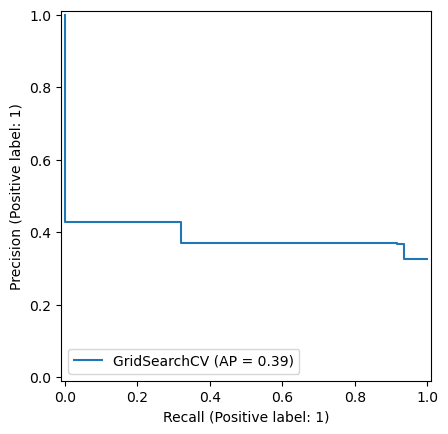

In [83]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(dt_grid_model, X_test, y_test)

# modelin genel performansı çok düşük.

### 

### Random Forest

In [84]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_model.fit(X_train, y_train)

# Datamız unbalanced olduğundan ve hedef labelımın skoru kötü olduğundan direk class_weight = "balanced" kullandım. 
# Unbalanced data setlerinde class_weight'i gridsearch e vermeye gerek yok.

RandomForestClassifier(class_weight='balanced', random_state=101)

In [85]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

# overfiting var görünüyor.

Test_Set
[[79 18]
 [20 27]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.60      0.57      0.59        47

    accuracy                           0.74       144
   macro avg       0.70      0.69      0.70       144
weighted avg       0.73      0.74      0.73       144


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [86]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = cv,
                       return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# overfiting olduğunu teyit ettim.

test_accuracy      0.781004
train_accuracy     0.999807
test_precision     0.708739
train_precision    1.000000
test_recall        0.625000
train_recall       0.999444
test_f1            0.661902
train_f1           0.999721
dtype: float64

In [87]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.8, 1]}

In [88]:
model = RandomForestClassifier(class_weight={0:1, 1:4},random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose=2).fit(X_train, y_train)

# class_weight="balanced" yetersiz geldiğinden 1'e 4 oranında ağırlıklandırıldı.

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [89]:
rf_grid_model.best_params_

{'max_depth': 2,
 'max_features': 2,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 128}

In [90]:
rf_grid_model.best_score_

0.9700000000000001

In [91]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

# overfiting giderilmiş görünüyor ama kesin teyidimizi CV'da yapacağız.

# Hedef classımız Test datasındaki 1 scorlarını  CV'dan alacağımız validation setlerinin ortalama değeri ile karşılaştırıp 
# skorumuzu teyit edeceğiz.

Test_Set
[[35 62]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.36      0.52        97
           1       0.42      0.94      0.58        47

    accuracy                           0.55       144
   macro avg       0.67      0.65      0.55       144
weighted avg       0.76      0.55      0.54       144


Train_Set
[[165 211]
 [  5 195]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.60       376
           1       0.48      0.97      0.64       200

    accuracy                           0.62       576
   macro avg       0.73      0.71      0.62       576
weighted avg       0.80      0.62      0.62       576



In [92]:
model = RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=2, max_features=2,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=128,
                       random_state=101)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# Overfiting olmadığını teyit ettim. Test datasındaki 1 classının skorları ile validation setinin skorları tutarlı.

test_accuracy      0.614519
train_accuracy     0.635989
test_precision     0.473992
train_precision    0.488134
test_recall        0.960000
train_recall       0.978889
test_f1            0.634247
train_f1           0.651366
dtype: float64

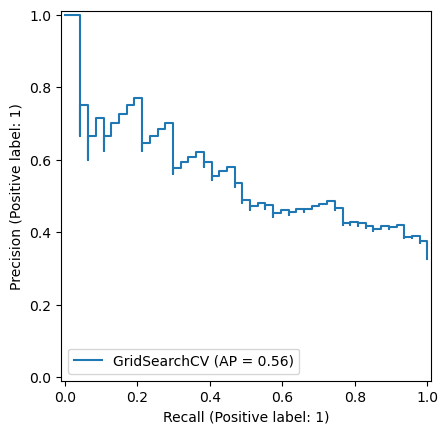

In [93]:
PrecisionRecallDisplay.from_estimator(rf_grid_model, X_test, y_test);

# RF modelin genel performansı DT'den daha iyi